# PCA Shape Models of the Spine
Use PCA to construct a statistical shape model of the spine.

The spine data consists of 200 examples of 26 3D coordinates corresponding to the centroids of the vertebral bodies.

In [1]:
import numpy as np

spine_data = np.genfromtxt('path to data')
n, m = spine_data.shape

# the data is stored as a one 78x200 matrix
# for visualisation purposes we split the data
# into three sets of x, y, and z coordinates
num_centroids = n//3;
x_ind = range(num_centroids)
y_ind = range(num_centroids,num_centroids*2)
z_ind = range(num_centroids*2,num_centroids*3)

cx = spine_data[x_ind,:];
cy = spine_data[y_ind,:];
cz = spine_data[z_ind,:];

print('Dimension:\t' + str(n))
print('Samples:\t' + str(m))

Dimension:	78
Samples:	200


visualise the raw input data

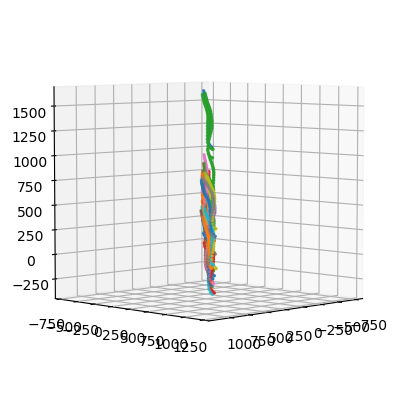

In [2]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

def plot_spines(x,y,z,max_range=None,marker_size=10,figure_size=5):

    fig = plt.figure(figsize=(figure_size, figure_size), dpi=100)
    ax = fig.gca(projection='3d')
    for s in range(x.shape[1]):
        ax.scatter(x[:,s], y[:,s], z[:,s], s=marker_size, marker='.')
        ax.plot(x[:,s], y[:,s], z[:,s])

    if max_range == None:
        max_range = np.array([x.max()-x.min(), y.max()-y.min(), z.max()-z.min()]).max() / 2.0

    mid_x = (x.max()+x.min()) * 0.5
    mid_y = (y.max()+y.min()) * 0.5
    mid_z = (z.max()+z.min()) * 0.5
    ax.set_xlim(mid_x - max_range, mid_x + max_range)
    ax.set_ylim(mid_y - max_range, mid_y + max_range)
    ax.set_zlim(mid_z - max_range, mid_z + max_range)
    ax.view_init(5,45)
    ax.grid()
    
plot_spines(cx, cy, cz)

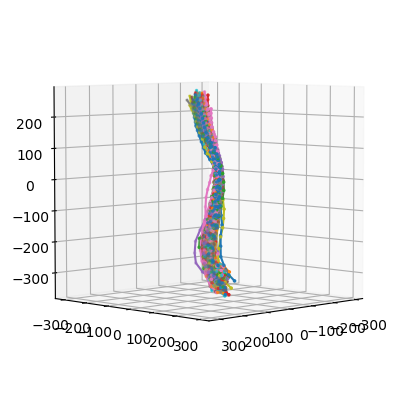

In [3]:
# spatial normalisation
cx_norm = cx - np.tile(np.mean(cx,axis=0),(num_centroids,1))
cy_norm = cy - np.tile(np.mean(cy,axis=0),(num_centroids,1))
cz_norm = cz - np.tile(np.mean(cz,axis=0),(num_centroids,1))

plot_spines(cx_norm, cy_norm, cz_norm)

the average human spine

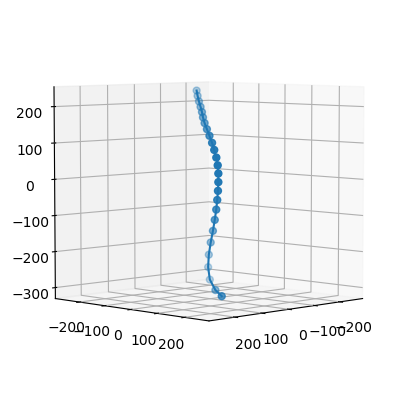

In [4]:
cx_mean = np.mean(cx_norm,axis=1)
cy_mean = np.mean(cy_norm,axis=1)
cz_mean = np.mean(cz_norm,axis=1)

plot_spines(cx_mean.reshape(-1,1), cy_mean.reshape(-1,1), cz_mean.reshape(-1,1), marker_size=100)

## Running PCA

Dimension:	78
Samples:	200


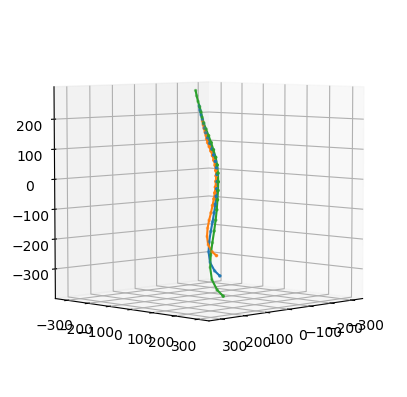

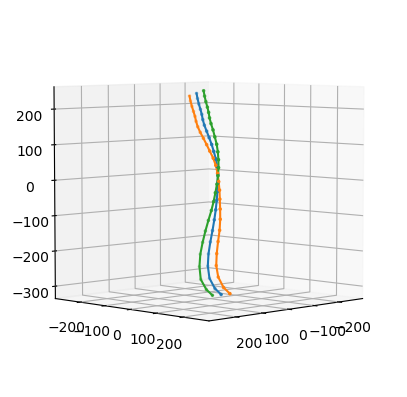

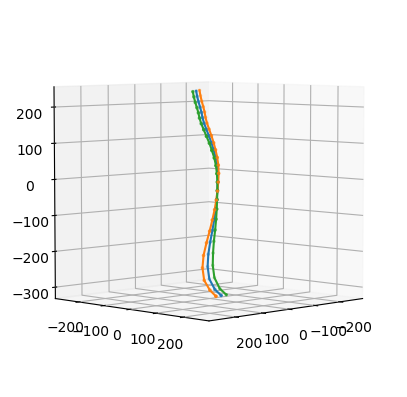

In [8]:
import sklearn.decomposition as decomp

X = np.vstack((cx_norm, cy_norm, cz_norm))
n, m = X.shape
print('Dimension:\t' + str(n))
print('Samples:\t' + str(m))

# Create PCA instance
pca = decomp.PCA()

# Fit the data
pca.fit(X.T)

# Get the mean from PCA
mu_X = pca.mean_

# Get principal components from PCA
U = pca.components_.T

# Get the eigenvalues from PCA's singular values
D = pca.singular_values_**2 / (m - 1)


num_modes = 3
for i in range(num_modes):

    # add and subtract 2 times the standard deviation from the mean
    sp = mu_X + U[:,i] * np.sqrt(D[i]) * 3
    sn = mu_X - U[:,i] * np.sqrt(D[i]) * 3
    
    cx = np.vstack((mu_X[x_ind], sp[x_ind], sn[x_ind])).T
    cy = np.vstack((mu_X[y_ind], sp[y_ind], sn[y_ind])).T
    cz = np.vstack((mu_X[z_ind], sp[z_ind], sn[z_ind])).T
        
    plot_spines(cx, cy, cz)
